## 可视化EEG数据

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
data_lyh_left_hand_orginal = np.load("left_hand_orginal.npy")
print(data_lyh_left_hand_orginal.shape)
print(data_lyh_left_hand_orginal[0])

(3262, 19)
[1.1300000e+02 0.0000000e+00 4.3151280e+03 4.2878210e+03 4.3337180e+03
 4.3197440e+03 4.2980770e+03 4.2807690e+03 4.2824360e+03 4.2674360e+03
 4.2787180e+03 4.2655130e+03 4.4851280e+03 4.4693590e+03 4.3852560e+03
 4.4362820e+03 0.0000000e+00 0.0000000e+00 1.7014329e+09]


In [4]:
data_lyh_left_hand_orginal_processed = np.load("left_hand_processed.npy")
print(data_lyh_left_hand_orginal_processed.shape)
print(data_lyh_left_hand_orginal_processed[0])

(15, 3262)
[-0.32854567  2.17188222  3.57960965 ...  3.00352535  4.04115984
  4.30757117]


### 可视化lyh数据集的四类数据

#### 未滤波 vs 滤波 

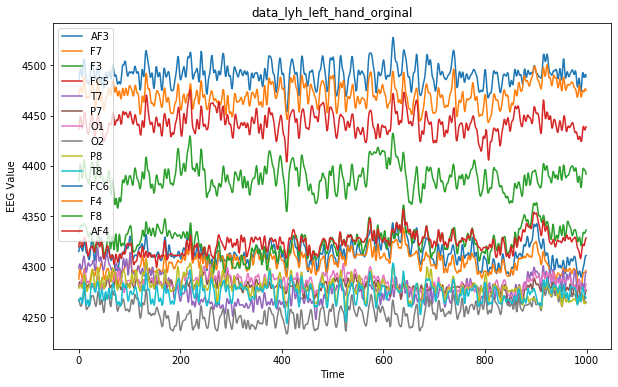

In [14]:
channel_names = ["AF3","F7","F3","FC5","T7","P7","O1","O2","P8","T8","FC6","F4","F8","AF4"]

# eeg data 取一千个采样点, size=(1000, 14)
eeg_data_original = data_lyh_left_hand_orginal[0:1000, 2:16].T  # 示例数据，替换为你的实际数据

# 可视化EEG信号
plt.figure(figsize=(10, 6))
for i in range(eeg_data_original.shape[0]):
    plt.plot(eeg_data[i], label=channel_names[i])

plt.title('data_lyh_left_hand_orginal')
plt.xlabel('Time')
plt.ylabel('EEG Value')
plt.legend()  # 显示图例
plt.show()

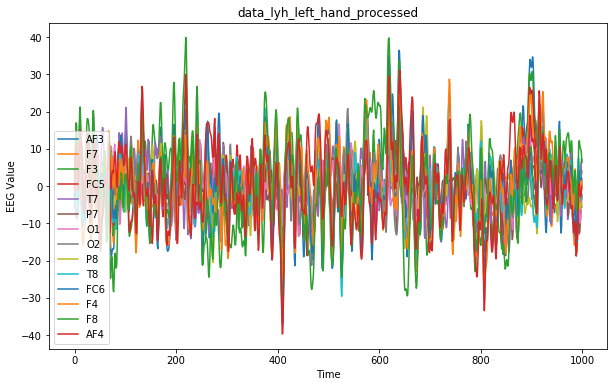

In [17]:
channel_names = ["AF3","F7","F3","FC5","T7","P7","O1","O2","P8","T8","FC6","F4","F8","AF4"]

# eeg data 取一千个采样点, size=(1000, 14)
eeg_data_processed = data_lyh_left_hand_orginal_processed[0:14, 0:1000]  # 示例数据，替换为你的实际数据

# 可视化EEG信号
plt.figure(figsize=(10, 6))
for i in range(eeg_data_processed.shape[0]):
    plt.plot(eeg_data_processed[i], label=channel_names[i])

plt.title('data_lyh_left_hand_processed')
plt.xlabel('Time')
plt.ylabel('EEG Value')
plt.legend()  # 显示图例
plt.show()

#### 不同类别对比

In [4]:
data_lyh_leg_original = np.load("leg_orginal.npy")
data_lyh_leg_original_processed = np.load("leg_processed.npy")
data_lyh_nothing_original = np.load("no_nothing_orginal.npy")
data_lyh_nothing_original_processed = np.load("no_nothing_processed.npy")
data_lyh_right_hand_original = np.load("right_hand_orginal.npy")
data_lyh_right_hand_original_processed = np.load("right_hand_processed.npy")

In [14]:
def plot_eeg(eeg_data, label):
    channel_names = ["AF3","F7","F3","FC5","T7","P7","O1","O2","P8","T8","FC6","F4","F8","AF4"]

    # 可视化EEG信号
    plt.figure(figsize=(10, 6))
    for i in range(eeg_data.shape[0]):
        plt.plot(eeg_data[i], label=channel_names[i])

    plt.title(label)
    plt.xlabel('Time')
    plt.ylabel('EEG Value')
    plt.legend()  # 显示图例
    plt.show()

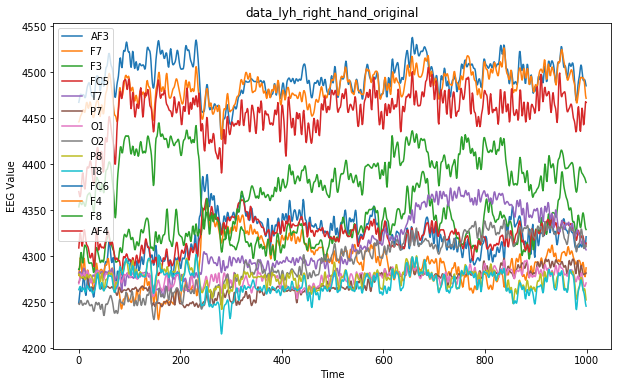

In [16]:
plot_eeg(data_lyh_right_hand_original[2000:3000, 2:16].T, "data_lyh_right_hand_original")

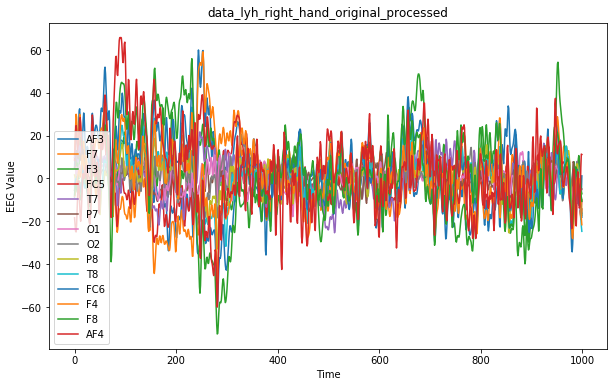

In [17]:
plot_eeg(data_lyh_right_hand_original_processed[0:14, 2000:3000], "data_lyh_right_hand_original_processed")

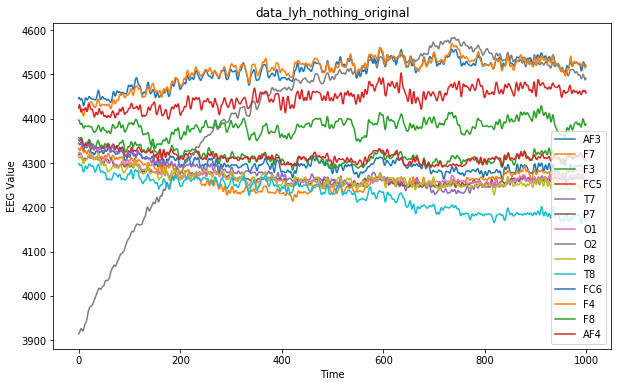

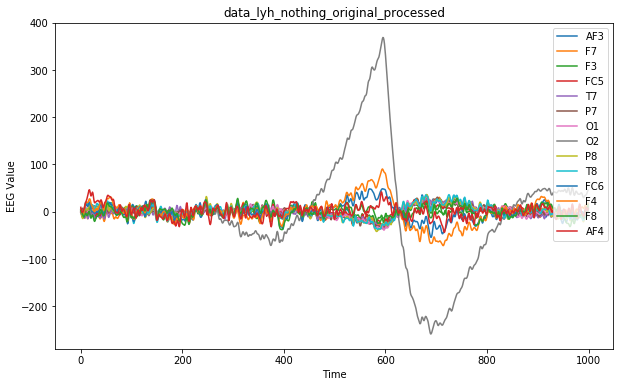

In [14]:
plot_eeg(data_lyh_nothing_original[1000:2000, 2:16].T, "data_lyh_nothing_original")
plot_eeg(data_lyh_nothing_original_processed[0:14, 0:1000], "data_lyh_nothing_original_processed")

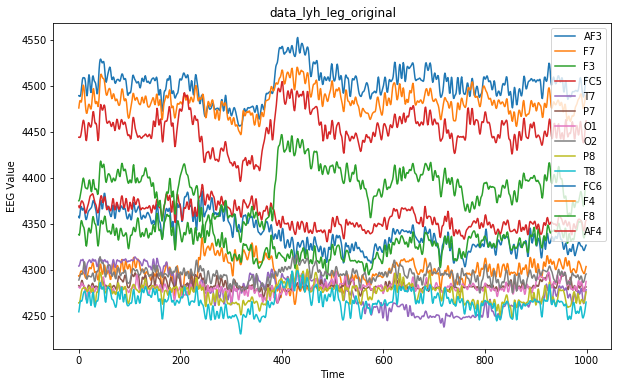

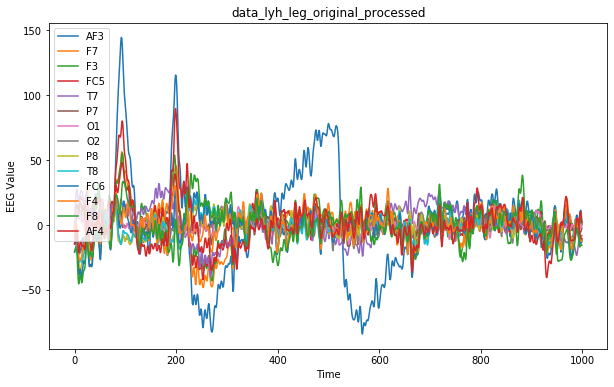

In [15]:
plot_eeg(data_lyh_leg_original[1000:2000, 2:16].T, "data_lyh_leg_original")
plot_eeg(data_lyh_leg_original_processed[0:14, 0:1000], "data_lyh_leg_original_processed")

### 可视化bcic数据

In [37]:
mat_data = loadmat('s001.mat')

In [38]:
mat_data['x'].shape

(22, 1000, 288)

In [39]:
mat_data['y'].shape

(1, 288)

In [50]:
# 采样一些数据用来可视化，字典类型，key：标签，value：数据
num = 0
bcic_data_dir = {i: [] for i in range(4)}
for i in range(288):
    if len(bcic_data_dir[mat_data['y'][0][i]]) <= 5:
        bcic_data_dir[mat_data['y'][i]].append(mat_data['x'][:,:,i])
        num += 1
    if num >= 20:
        break

TypeError: unhashable type: 'numpy.ndarray'

ERROR! Session/line number was not unique in database. History logging moved to new session 40


In [41]:
def plot_eeg_bcic(eeg_data, label):
    channel_names = ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', \
        'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', \
        'EEG-Pz', 'EEG-15', 'EEG-16']

    # 可视化EEG信号
    plt.figure(figsize=(10, 6))
    for i in range(eeg_data.shape[0]):
        plt.plot(eeg_data[i], label=channel_names[i])

    plt.title(label)
    plt.xlabel('Time')
    plt.ylabel('EEG Value')
    plt.legend()  # 显示图例
    plt.show()

In [23]:
bcic_data_dir[0][0]['data'].shape

(3, 1000, 9)

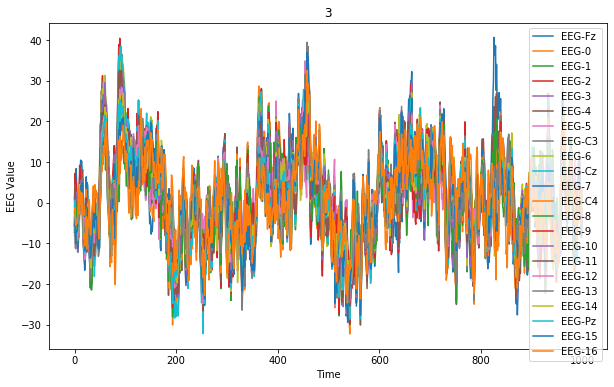

In [44]:
plot_eeg_bcic(mat_data['x'][:,:,0], mat_data['y'][0][0])

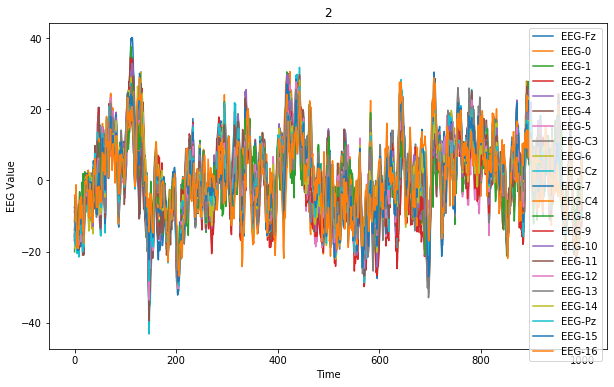

In [45]:
plot_eeg_bcic(mat_data['x'][:,:,1], mat_data['y'][0][1])

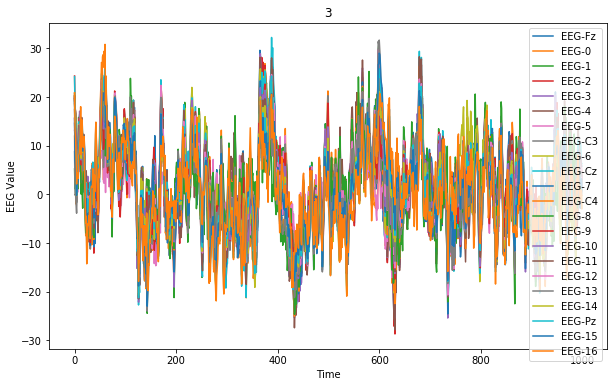

In [46]:
plot_eeg_bcic(mat_data['x'][:,:,2], mat_data['y'][0][0])